# SVC Parameters When Using RBF Kernel (XOR problem)

This file follows exactly the guide of Chris Albon. You can find the original [here](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/).

My note for SVM: https://note.dinhanhthi.com/support-vector-machine

---



In [1]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

Below codes are not important to the main idea.

In [20]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    c='',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


## Create XOR Data

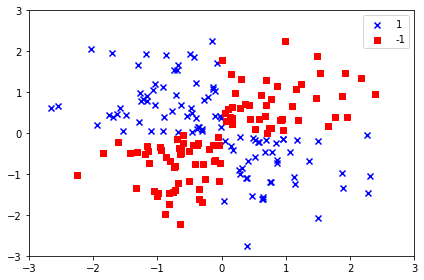

In [9]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Classify Using a Linear Kernel

- The decision boundary is a straight line (or hyperplane in higher dimensions).
- Linear kernels are rarely used in practice.
- In this case, it is not very good at classifying.

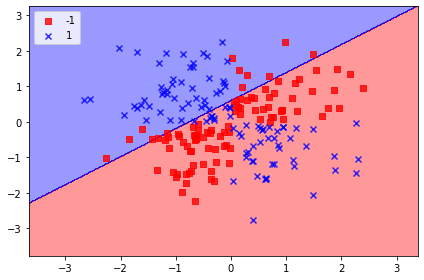

In [21]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Classify Using a RBF Kernel

- `gamma` is a parameter of the RBF kernel and can be thought of as the "spread" of the kernel and therefore the decision region. 
- `C` is a parameter of the SVC learner and is the penalty for misclassifying a data point. 

### Different gamma

In this case, we use the default value for `C` (`C=1`).

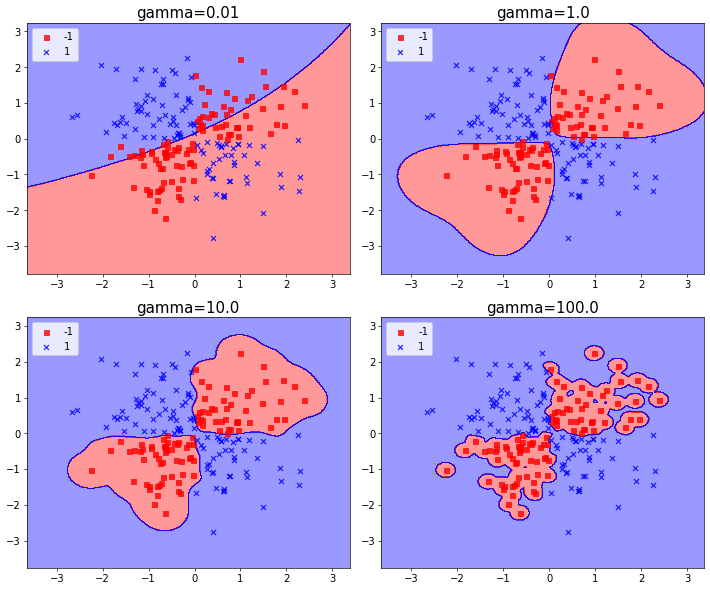

In [47]:
# Create a SVC classifier using an RBF kernel
# gamma=0.01
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# plot with various axes scales
plt.figure(figsize=(12, 10), dpi= 60)
# plt.rcParams.update({'font.size': 12})


# Visualize the decision boundaries
plt.subplot(221)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('gamma=0.01', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
# gamma=1.0
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(222)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('gamma=1.0', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
# gamma=10.0
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(223)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('gamma=10.0', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
# gamma=100.0
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(224)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('gamma=100.0', fontsize=18)

plt.show()

- `gamma=0.01`: In the case of our SVC classifier and data, when using a low gamma like 0.01, the decision boundary is not very ‘curvy’, rather it is just one big sweeping arch.
- `gamma=1.0`: You can see a big difference when we increase the `gamma` to 1. Now the decision boundary is starting to better cover the spread of the data.
- `gamma=10.0`: the spread of the kernel is less pronounced. The decision boundary starts to be highly effected by individual data points (i.e. variance).
- `gamma=100.0`: With high `gamma`, the decision boundary is almost entirely dependent on individual data points, creating “islands”. This data is clearly overfitted.

### Different C

In this case, we use `gamma=0.01` which is bad on the above case. Let's see how it changes with different values of `C`.

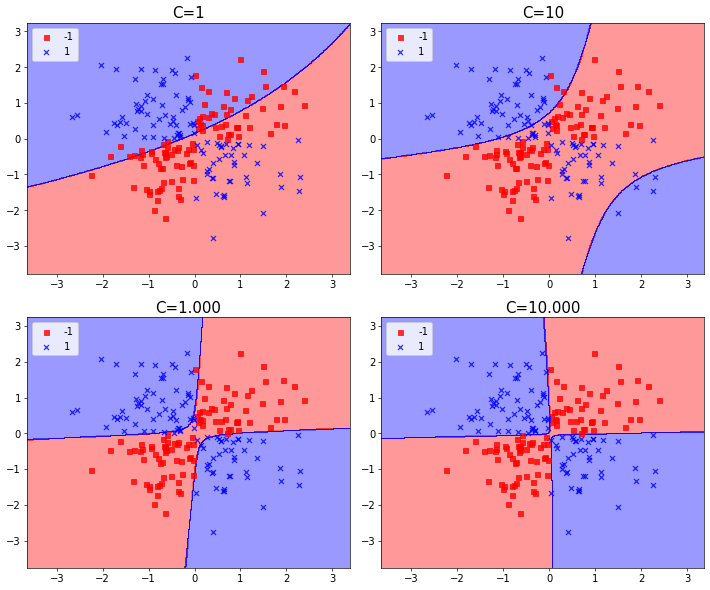

In [49]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# plot with various axes scales
plt.figure(figsize=(12, 10), dpi= 60)

# Visualize the decision boundaries
plt.subplot(221)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('C=1', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(222)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('C=10', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(223)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('C=1.000', fontsize=18)

#====================

# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.subplot(224)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('C=10.000', fontsize=18)

plt.show()

- `C=1`: the classifier is clearly tolerant of misclassified data point. There are many red points in the blue region and blue points in the red region.
- `C=10`:the classifier starts to become very intolerant to misclassified data points and thus the decision boundary becomes less biased and has more variance (i.e. more dependent on the individual data points).
- `C=1000`: the classifier “works really hard” to not misclassify data points and we see signs of overfitting.
- `C=10000`:  the classifier is heavily penalized for any misclassified data points and therefore the margins are small.